(40,) (40,) (20,) (20,)


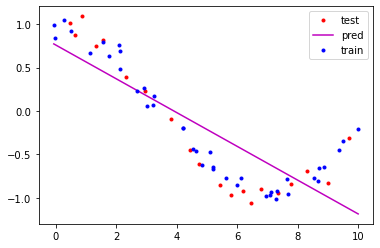

[-0.19411965  0.75803483]


In [1]:
'''
Illustrates a simple regression task on 
simulated data. 

Trying to find polynomial approximations 
to a sinusoid

It gives an idea how 
non linear regression works

/home/splab-ece/deepl/nonlinear.ipynb

'''

#from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt


def SimulData():
        # Simulate some data for training 
        x_train = np.arange(0,10, 0.25 )
        x_train = x_train + 1.0/3.0 * np.random.randn(x_train.size);
        y_train  = np.cos( x_train  * np.pi /7) +  0.1 * np.random.randn(x_train.size);

        x_test = np.arange(0,10, 0.5 )
        x_test = x_test + 1.0/3.0 * np.random.randn(x_test.size);
        y_test  = np.cos( x_test  * np.pi /7)+  0.1 * np.random.randn(x_test.size)

        return (x_train,y_train) , (x_test, y_test)

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = SimulData();
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
xs = np.arange( np.min(x_train), np.max(x_train),0.01 )


#    Line Model 
x_t1 = np.vstack((x_train,np.ones(x_train.shape))).T;
y_t1 = np.zeros((x_train.shape[0],1))
y_t1 = y_train

a = np.dot(np.linalg.inv( np.dot(x_t1.T, x_t1) ), np.dot(x_t1.T,y_t1))
ys = xs * a[0] + a[1]; 

tst = plt.plot(x_test,y_test,'r.',label='test');
pred = plt.plot(xs,ys,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');

#Evaluate the Test Error (Mean Square ERROR - MSE)

plt.legend()
plt.show()
print(a)


# TRY TO FIT HIGHER ORDER MODELS 
# y = a0 + a1 x + a2 x^2  + ... + am x^m
#  FOR MODEL ORDER m = 1,2,3,4,5


# Plot the Test MSE vs model order 

In [2]:
def Cost(X, y, A):
    m=X.shape[0]
    predictions=np.dot(X , A)
    sqrErrors = np.square(predictions-y)
    J =1/(2*m) * np.sum(sqrErrors)
    return J


def Gradient_Descent(X,y,iterations=1000,learning_rate=0.1):

    A = np.zeros((X.shape[1],1))
    J_vals = [] #np.zeros((iterations, 1))
    m=X.shape[0]
    for i in range(0,iterations):
        error = np.dot(X , A) - y
        #print(X.T.shape, error.shape)
        delta = (1/m * np.dot(X.T , error))
        #print(delta.shape)
        A = A - learning_rate * delta
        #print(A.shape)
        J_vals.append(Cost(X, y, A))
        #print(X.shape,error.shape)
        
    return A, J_vals  

**For M = 2**

In [3]:
# y = a0 + a1 x + a2 x^2
X_train = np.ones((x_train.shape[0], 2))
X_train[:, 0] = x_train
X_train[:, 1] = x_train**2

Y_train = y_train.reshape((x_train.shape[0], 1))

X_test = np.ones((x_test.shape[0], 2))
X_test[:, 0] = x_test
X_test[:, 1] = x_test**2

Y_test = y_test.reshape((x_test.shape[0], 1))

mu = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)

XT_norm = (X_train - mu) / std
X_test = (X_test - mu) / std

XT_norm =  np.hstack((np.ones((XT_norm.shape[0],1)), XT_norm))
X_test =  np.hstack((np.ones((X_test.shape[0],1)), X_test))

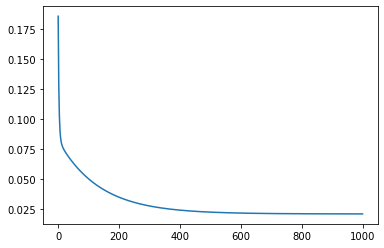

In [4]:
weigths, J = Gradient_Descent(XT_norm, Y_train)
plt.plot(J)
plt.show()

In [5]:
XS = np.ones((xs.shape[0], 2))
XS[:, 0] = xs
XS[:, 1] = xs**2

XS = (XS - mu) / std
XS =  np.hstack((np.ones((XS.shape[0],1)), XS))

y_pred2 = np.dot(XS, weigths)

In [6]:
#y_pred2 = weigths[0] + ((xs - mu)/std) * weigths[1] + ((xs - mu)/std) ** 2 * weigths[2]

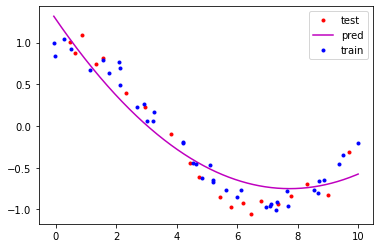

[-0.19411965  0.75803483]


In [6]:
tst = plt.plot(x_test,y_test,'r.',label='test');
pred = plt.plot(xs,y_pred2,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');

#Evaluate the Test Error (Mean Square ERROR - MSE)

plt.legend()
plt.show()
print(a)

**For M = 4**

In [8]:
# y = a0 + a1 x + a2 x^2 + x3 + x4
(x_train, y_train), (x_test, y_test) = SimulData();
X_train = np.ones((x_train.shape[0], 4))
X_train[:, 0] = x_train
X_train[:, 1] = x_train**2
X_train[:, 2] = x_train**3
X_train[:, 3] = x_train**4

Y_train = y_train.reshape((x_train.shape[0], 1))

X_test = np.ones((x_test.shape[0], 4))
X_test[:, 0] = x_test
X_test[:, 1] = x_test**2
X_test[:, 2] = x_test**3
X_test[:, 3] = x_test**4

Y_test = y_test.reshape((x_test.shape[0], 1))

mu = np.mean(X_train, axis = 0)
std = np.std(X_train, axis = 0)

XT_norm = (X_train - mu) / std
X_test = (X_test - mu) / std

XT_norm =  np.hstack((np.ones((XT_norm.shape[0],1)), XT_norm))
X_test =  np.hstack((np.ones((X_test.shape[0],1)), X_test))

[[-0.23680399]
 [-0.99339903]
 [-0.39281474]
 [ 0.26156985]
 [ 0.67599542]]


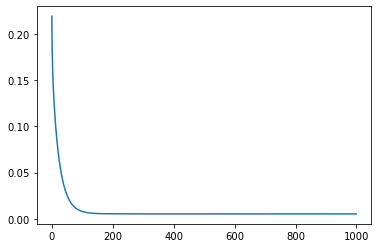

In [9]:
weigths, J = Gradient_Descent(XT_norm, Y_train)
print(weigths)
plt.plot(J)
plt.show()

In [10]:
XS = np.ones((xs.shape[0], 4))
XS[:, 0] = xs
XS[:, 1] = xs**2
XS[:, 2] = xs**3
XS[:, 3] = xs**4

XS = (XS - mu) / std
XS =  np.hstack((np.ones((XS.shape[0],1)), XS))

y_pred2 = np.dot(XS, weigths)

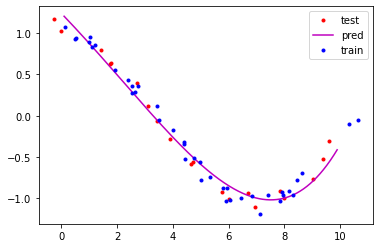

In [11]:
tst = plt.plot(x_test,y_test,'r.',label='test');
pred = plt.plot(xs,y_pred2,'m',label='pred');
tr = plt.plot(x_train,y_train,'b.',label='train');

#Evaluate the Test Error (Mean Square ERROR - MSE)

plt.legend()
plt.show()
#print(a)